In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Historical income data
data = {
    "Year": ["2023", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006", "2005", "2004", "2003", "2002", "2001", "2000"],
    "Average": [12178, 11480, 10832, 10608, 10750, 10664, 10610, 10336, 10394, 9982, 9481, 9394, 8722, 7812, 7410, 7691, 6790, 6181, 5934, 5666, 5670, 5667, 5972, 5436],
    "Median": [9329, 8615, 8220, 7744, 7981, 7955, 7850, 7748, 7733, 7320, 7030, 6772, 6307, 5600, 5360, 5492, 4846, 4430, 4270, 4066, 4071, 4096, 4363, 4000]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Prepare the data for training
X = df[['Year']]
y_avg = df['Average']
y_med = df['Median']

# Train a linear regression model for Average Income
lr_avg = LinearRegression()
lr_avg.fit(X, y_avg)

# Train a linear regression model for Median Income
lr_med = LinearRegression()
lr_med.fit(X, y_med)

# Predict income for the year 2024
year_2024_df = pd.DataFrame({'Year': [2024]})

predicted_avg_income_2024 = lr_avg.predict(year_2024_df)[0]
predicted_med_income_2024 = lr_med.predict(year_2024_df)[0]

print("Predicted Average Income for 2024:", predicted_avg_income_2024)
print("Predicted Median Income for 2024:", predicted_med_income_2024)


Predicted Average Income for 2024: 12420.568840579712
Predicted Median Income for 2024: 9306.79710144928


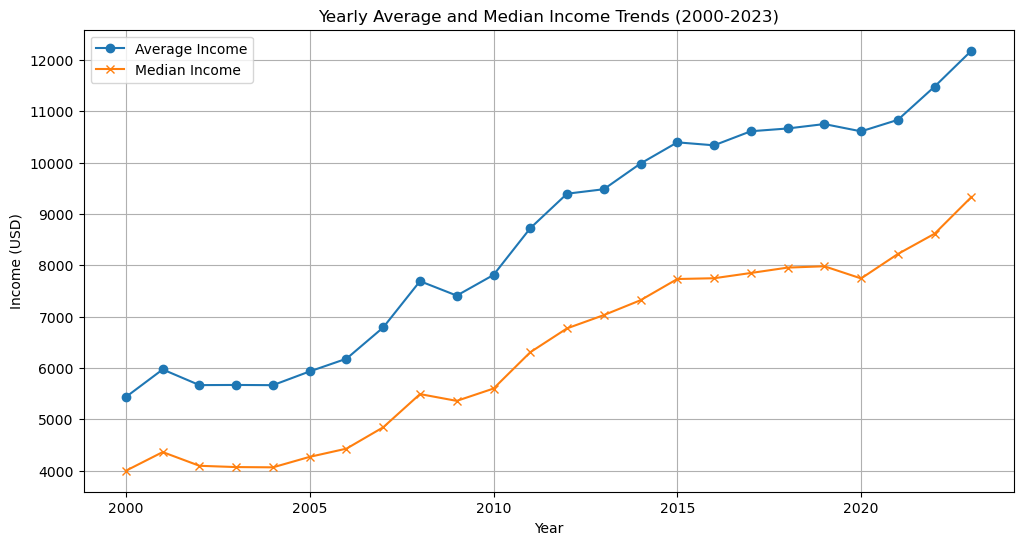

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Average'], label='Average Income', marker='o')
plt.plot(df['Year'], df['Median'], label='Median Income', marker='x')
plt.xlabel('Year')
plt.ylabel('Income (USD)')
plt.title('Yearly Average and Median Income Trends (2000-2023)')
plt.legend()
plt.grid(True)
plt.show()


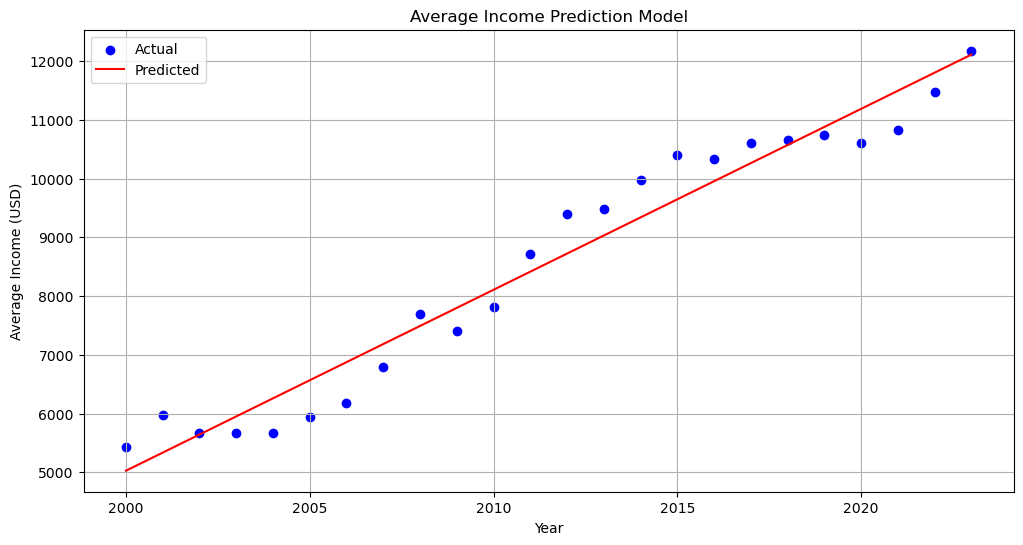

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y_avg, color='blue', label='Actual')
plt.plot(X, lr_avg.predict(X), color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Average Income (USD)')
plt.title('Average Income Prediction Model')
plt.legend()
plt.grid(True)
plt.show()


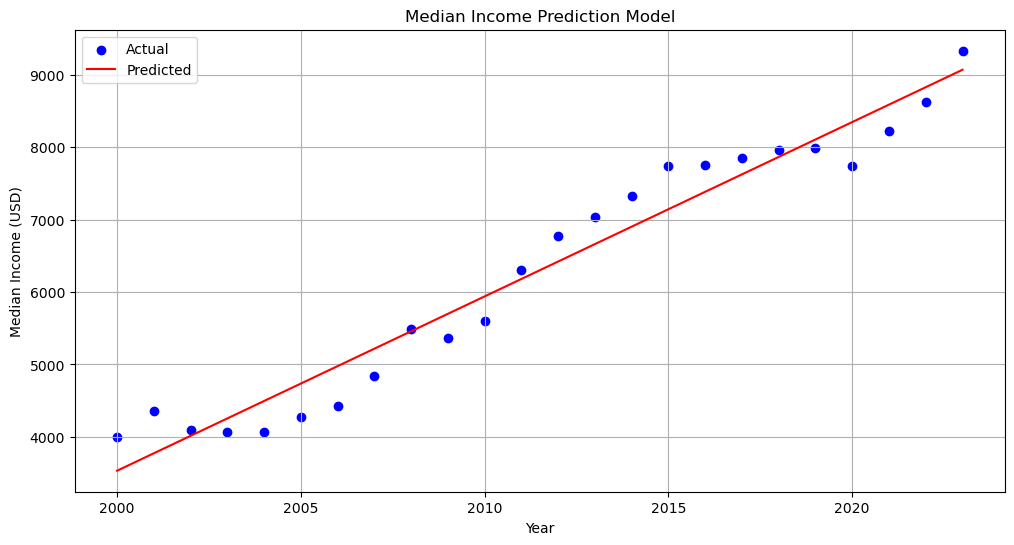

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y_med, color='blue', label='Actual')
plt.plot(X, lr_med.predict(X), color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Median Income (USD)')
plt.title('Median Income Prediction Model')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
print("Predicted Average Income for 2024:", predicted_avg_income_2024)
print("Predicted Median Income for 2024:", predicted_med_income_2024)


Predicted Average Income for 2024: 12420.568840579712
Predicted Median Income for 2024: 9306.79710144928


In [17]:
from sklearn.preprocessing import StandardScaler

# Selecting the years 2019 to 2023 for training data
training_data = df[(df['Year'] >= 2019) & (df['Year'] <= 2023)]

# Splitting features and target variables
X_train = training_data[['Year']]
y_train_avg = training_data['Average']
y_train_med = training_data['Median']

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a linear regression model for Average Income
lr_avg = LinearRegression()
lr_avg.fit(X_train_scaled, y_train_avg)

# Train a linear regression model for Median Income
lr_med = LinearRegression()
lr_med.fit(X_train_scaled, y_train_med)

# Predict income for the years 2019 to 2023
predicted_avg_income_train = lr_avg.predict(X_train_scaled)
predicted_med_income_train = lr_med.predict(X_train_scaled)

# Calculate Mean Squared Error for training data
mse_avg_train = mean_squared_error(y_train_avg, predicted_avg_income_train)
mse_med_train = mean_squared_error(y_train_med, predicted_med_income_train)

print("Mean Squared Error for Average Income (Training Data):", mse_avg_train)
print("Mean Squared Error for Median Income (Training Data):", mse_med_train)


Mean Squared Error for Average Income (Training Data): 65770.56000000004
Mean Squared Error for Median Income (Training Data): 54549.98000000004


In [18]:
# Train a linear regression model for Average Income
lr_avg = LinearRegression()
lr_avg.fit(X_train_scaled, y_train_avg)

# Train a linear regression model for Median Income
lr_med = LinearRegression()
lr_med.fit(X_train_scaled, y_train_med)

# Calculate R-squared for training data
r_squared_avg_train = lr_avg.score(X_train_scaled, y_train_avg)
r_squared_med_train = lr_med.score(X_train_scaled, y_train_med)

print("R-squared for Average Income (Training Data):", r_squared_avg_train)
print("R-squared for Median Income (Training Data):", r_squared_med_train)


R-squared for Average Income (Training Data): 0.8086564626958628
R-squared for Median Income (Training Data): 0.8234741364112119
